## Notebook to run the jaguar data set

In [548]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import numpy as np
from datetime import date
import pkg_resources
from sklearn.impute import SimpleImputer
from pandas_plink import read_plink
from copy import deepcopy
import itertools as it
import statsmodels.api as sm
from scipy.stats.distributions import chi2
from random import choices
import scipy as sp
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import haversine_distances

# viz
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import plotly.express as px

# feems
import sys
sys.path.append('../../')
from feems.utils import prepare_graph_inputs
from feems.spatial_graph import query_node_attributes
from feems import SpatialGraph, Viz, Objective
from feems.cross_validation import run_cv, comp_mats, run_cv_joint
from feems.helper_funcs import cov_to_dist, comp_genetic_vs_fitted_distance, plot_default_vs_long_range, get_best_lre
from feems.joint_ver import Joint_SpatialGraph, Joint_Objective

# change matplotlib fonts
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["axes.axisbelow"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
os.chdir("/Users/vivaswatshastry/Google Drive/Other computers/My Mac mini/Documents/feemsResults/jaguar/data")
coord = np.load("used_coordinates.npy")  # sample coordinates
outer = np.load("outer_coordinates.npy")  # outer coordinates
grid_path = "/Users/vivaswatshastry/src/feems/feems/data/grid_100.shp"  # path to discrete global grid

genotypes = np.load("genotypes.npy")  # genotypes

In [270]:
# outer, edges, grid, ipmap = prepare_graph_inputs(coord=coord, 
#                                              ggrid=grid_path,
#                                              translated=True, 
#                                              buffer=0,
#                                              outer=outer)

# sp_graph = SpatialGraph(genotypes, coord, grid, edges)
# sp_graph_jt = Joint_SpatialGraph(genotypes, coord, grid, edges)
# central_longitude,central_latitude = np.mean(grid,axis = 0)
# projection = ccrs.EquidistantConic(central_longitude, central_latitude)

/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


constant-w/variance fit, converged in 140 iterations, train_loss=6130208.2162306
lambda=400.00000, alpha=0.75405, beta=0.00000, converged in 89 iterations, train_loss=6116506.52676


/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:146: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.idx = nx.adjacency_matrix(self.sp_graph).nonzero()
/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:352: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  """Permuting the edge change matrix instead"""
/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


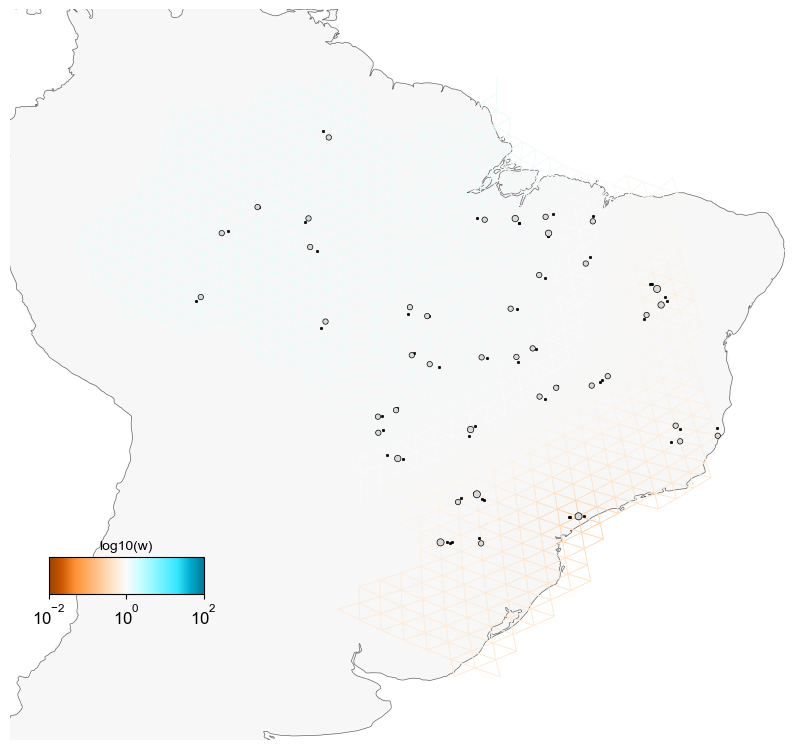

In [202]:
# lamb=400.
# sp_graph.fit(lamb=lamb)
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1, 1, 1, projection=projection)  
# v = Viz(ax, sp_graph, projection=projection, edge_width=.5, edge_zorder=100, sample_pt_size=12, 
#         obs_node_size=15, sample_pt_color="black", cbar_font_size=10)
# v.draw_map(); v.draw_samples(); v.draw_edges(use_weights=True); v.draw_obs_nodes(use_ids=False); v.draw_edge_colorbar()

6110894.178479917


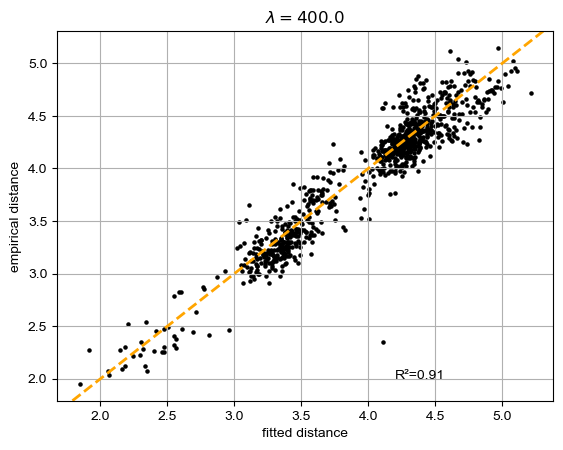

In [264]:
# tril_idx = np.tril_indices(sp_graph.n_observed_nodes, k=-1)
# obj = Objective(sp_graph); obj.inv(); obj.grad(reg=False); print(obj.neg_log_lik())
# fit_cov, _, emp_cov = comp_mats(obj)
# fit_dist = cov_to_dist(fit_cov)[tril_idx]
# emp_dist = cov_to_dist(emp_cov)[tril_idx]
# X = sm.add_constant(fit_dist)
# mod = sm.OLS(emp_dist, X)
# res = mod.fit()
# muhat, betahat = res.params

# plt.scatter(fit_dist, emp_dist, color="black", s=5)
# x_ = np.linspace(np.min(fit_dist), np.max(fit_dist), 20)
# plt.plot(x_, muhat + betahat * x_, color="orange", linestyle='--', linewidth=2)
# plt.text(4.2, 2, "R²={:.2f}".format(res.rsquared))
plt.xlabel("fitted distance"); plt.ylabel("empirical distance"); plt.title(r'$\lambda={:.1f}$'.format(lamb)); plt.grid()

# plt.plot(fit_dist,emp_dist/fit_dist-np.mean(emp_dist/fit_dist),'ko'); plt.axhline(-11*np.std(emp_dist/fit_dist),color='red')
# for k in np.where(emp_dist/fit_dist-np.mean(emp_dist/fit_dist)< -10* np.std(emp_dist/fit_dist))[0]:
    # x = np.floor(np.sqrt(2*k+0.25)-0.5).astype('int')+1; y = int(k - 0.5*x*(x-1)); print(x, y)

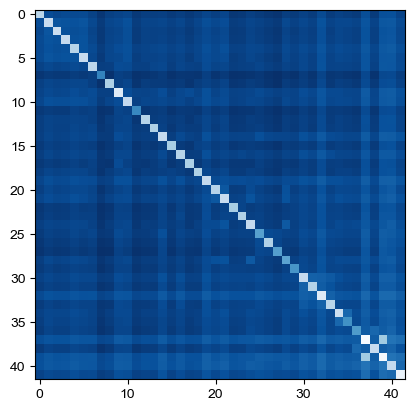

In [262]:
# lamb = 400.
# sp_graph_jt.fit(lamb=lamb,optimize_q='n-dim')
# fig = plt.figure(figsize = (10,10))
# ax = fig.add_subplot(1, 1, 1, projection=projection)  
# v = Viz(ax, sp_graph_jt, projection=projection, edge_width=2., edge_zorder=100, sample_pt_size=15, 
#         obs_node_size=20, sample_pt_color="black", cbar_font_size=10)
# v.draw_map(); v.draw_samples(); v.draw_edges(use_weights=True); v.draw_obs_nodes(use_ids=False); v.draw_edge_colorbar()
# v.ax.set_title(r'$\lambda={}$'.format(lamb))
# obs_grid = v.grid[obs_perm_ids,:]
# for i in range(len(pair)):
#     v.ax.plot(
#         [obs_grid[pair[i][0], 0],obs_grid[pair[i][1],0]],
#         [obs_grid[pair[i][0], 1],obs_grid[pair[i][1],1]],
#         color = 'olive', linewidth = 0.5
#     )
#     v.ax.text(
#         np.mean([obs_grid[pair[i][0], 0],obs_grid[pair[i][1], 0]]),
#         np.mean([obs_grid[pair[i][0], 1],obs_grid[pair[i][1], 1]]),
#         str("{:.3f}".format(pval[i])),
#         horizontalalignment="left",
#         verticalalignment="center",
#         size=v.obs_node_textsize*1.1
#     )
# for ie, e in enumerate([(24, 28),(29, 25),(30, 33),(7, 35),(11, 35),(25, 35),(27, 35),(25, 36),(27, 36),(38, 36),(40, 25),(40,27),(41,27)]):
#         v.draw_arrow([e],cval[ie],lw=2.2,hw=.5e5,hl=1e5,mode='sampled')

In [379]:
# 55 inds x 91k SNPs across 42 observed demes
# distribution of # inds in each deme -> sp_graph_jt.n_samples_per_obs_node_permuted
# sample_idx = nx.get_node_attributes(sp_graph_jt, "sample_idx")
# permuted_idx = query_node_attributes(sp_graph_jt, "permuted_idx")
# observed_permuted_idx = permuted_idx[: sp_graph_jt.n_observed_nodes]

freqs = np.zeros_like(sp_graph_jt.frequencies)
for i, node_id in enumerate(observed_permuted_idx):
    s = sample_idx[node_id]

    # compute mean at each node
    freqs[i,:] = np.mean(sp_graph_jt.genotypes[s,:], axis=0)/2
    # freqs[i,:] = np.sum(sp_graph_jt.genotypes[s,:], axis=0)

het = 2*freqs*(1-freqs)

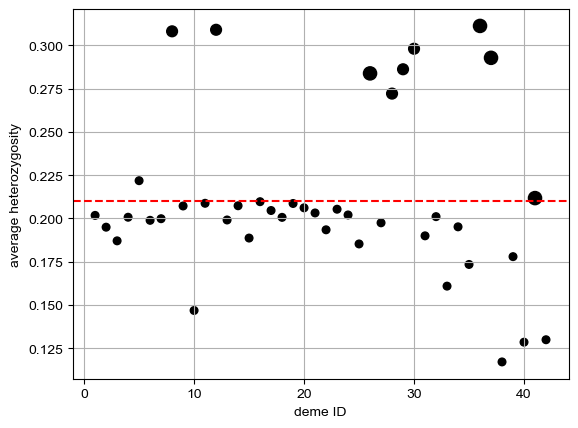

In [403]:
# allel.mean_pairwise_difference(np.vstack((freqs[:,0], (2*sp_graph_jt.n_samples_per_obs_node_permuted)-freqs[:,0])))
# plt.scatter(np.arange(1,sp_graph_jt.n_observed_nodes+1),het.mean(axis=1),color='k',marker='o',s=30*sp_graph_jt.n_samples_per_obs_node_permuted); plt.axhline(het.mean(),color='red',linestyle='--'); plt.xlabel('deme ID'); plt.ylabel('average heterozygosity'); plt.grid()
# alls = np.zeros((sp_graph_jt.genotypes.shape[1],2))
# for snp in range(sp_graph_jt.genotypes.shape[1]):
#     alls[snp,:] = allel.mean_pairwise_difference(np.vstack((freqs[:,snp], (2*sp_graph_jt.n_samples_per_obs_node_permuted)-freqs[:,snp])))
# [allel.mean_pairwise_difference(np.vstack((freqs[id,:], 2-freqs[id,:])))[0] for id in range(42)]

In [545]:
# mapdf = pd.DataFrame(columns=['chrom','id'])
# mapdf['chrom'] = ['chr1']*91038
# mapdf['id'] = range(1,91039)
# mapdf.to_csv('jag.map',sep=' ',index=False,header=False)
# os.getcwd()
# pd.DataFrame(genotypes).to_csv('jag.geno',sep=' ',index=False,header=False)

86104

/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:146: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.idx = nx.adjacency_matrix(self.sp_graph).nonzero()
/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:352: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  """Permuting the edge change matrix instead"""
/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


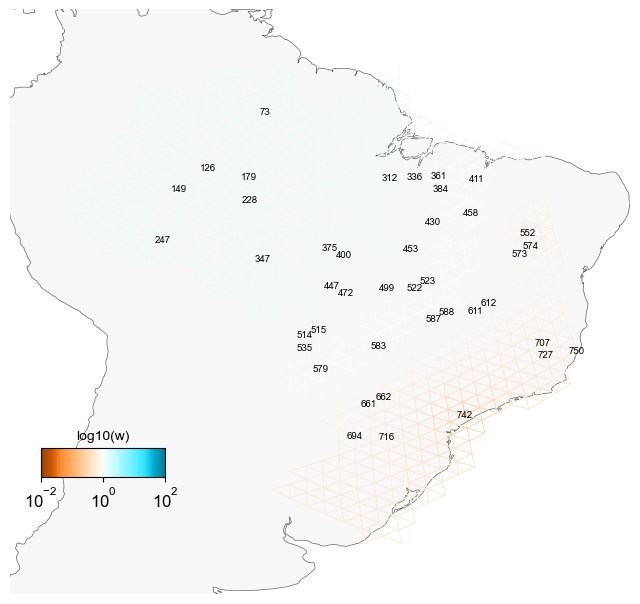

In [435]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1, projection=projection)  
v = Viz(ax, sp_graph, projection=projection, edge_width=.5, edge_zorder=100, sample_pt_size=12, 
        obs_node_size=15, sample_pt_color="black", cbar_font_size=10)
v.draw_map(); v.draw_edges(use_weights=True); v.draw_obs_nodes(use_ids=True); v.draw_edge_colorbar()
# v.ax.scatter(v.grid[permuted_idx[: v.sp_graph.n_observed_nodes],:][:,0],v.grid[permuted_idx[: v.sp_graph.n_observed_nodes],:][:,1],edgecolors="black",linewidth=v.obs_node_linewidth,s=het.mean(axis=1)*300,alpha=0.4,color='goldenrod',)

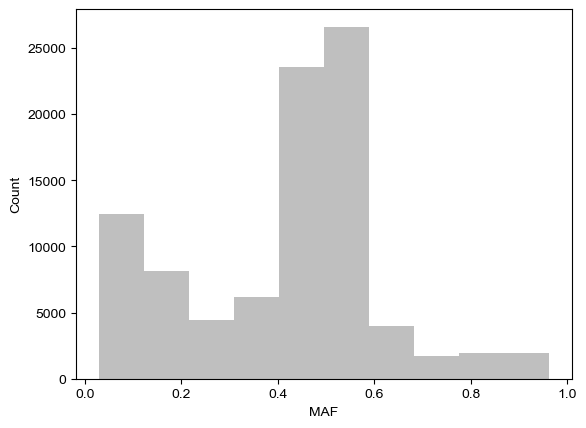

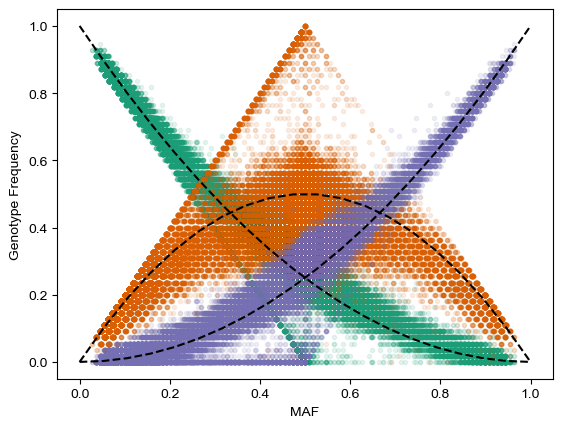

In [410]:
Y = 2 - np.array(genotypes)
n, p = Y.shape

plt.hist(f, color="gray", alpha=.5); plt.xlabel("MAF"); plt.ylabel("Count"); plt.show()

f = np.sum(Y, axis=0) / (2.0*n)
f_aa = np.sum(Y==0, axis=0) / n
f_Aa = np.sum(Y==1, axis=0) / n
f_AA = np.sum(Y==2, axis=0) / n

x = np.linspace(0, 1, 20)
plt.scatter(f, f_aa, alpha=.1, marker=".", color="#1b9e77", zorder=0)
plt.plot(x, (1-x)**2, "--", color="black", zorder=1) 
plt.scatter(f, f_Aa, alpha=.1, marker=".", color="#d95f02", zorder=0)
plt.plot(x, 2*x*(1-x), "--", color="black", zorder=1) 
plt.scatter(f, f_AA, alpha=.1, marker=".", color="#7570b3", zorder=0)
plt.plot(x, x**2, "--", color="black", zorder=1) 
plt.xlabel("MAF"); plt.ylabel("Genotype Frequency"); plt.show()

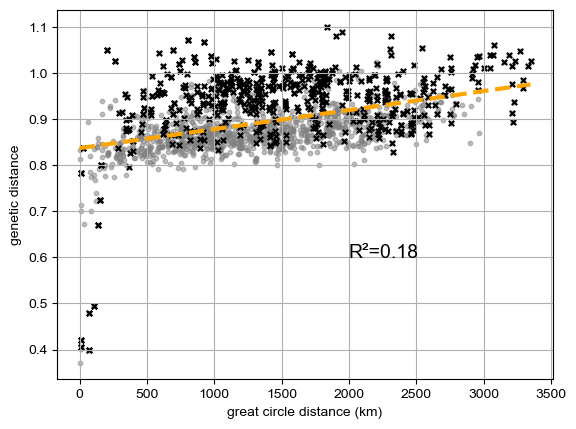

In [531]:
# D_geno = squareform(pdist(genotypes, metric="sqeuclidean")) / p
# coord_rad = coord[:,::-1] * np.pi / 180.0
# D_geo = haversine_distances(coord_rad) * 6371
# tril_idx = np.tril_indices(genotypes.shape[0], k=-1)
# x = D_geo[tril_idx]
# y = D_geno[tril_idx]
# X = sm.add_constant(x)
# mod = sm.OLS(y, X)
# res = mod.fit()
# muhat, betahat = res.params

# plt.scatter(x, y, marker="o", alpha=1, color="black",s=10)

## highlighting points that are from southeast pops
# plt.scatter(x, y, marker="o", color="grey",alpha=0.5,s=10)
# plt.scatter(D_geo[[1,2,38,12,53,28,0,36,44,8],:][D_geo[[1,2,38,12,53,28,0,36,44,8],:]>0],D_geno[[1,2,38,12,53,28,0,36,44,8],:][D_geno[[1,2,38,12,53,28,0,36,44,8],:]>0], marker="x", color="k",s=15)

x_ = np.linspace(np.min(x), np.max(x), 20)
plt.plot(x_, muhat + betahat * x_, zorder=2, color="orange", linestyle='--', linewidth=3)
plt.text(2000, .6, "R²={:.2f}".format(res.rsquared), fontsize=14); 
plt.xlabel("great circle distance (km)"); plt.ylabel("genetic distance"); plt.grid()

6103845.995719694


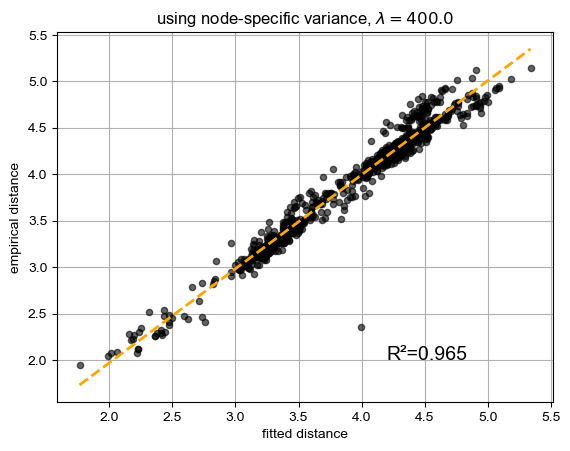

In [550]:
tril_idx = np.tril_indices(sp_graph.n_observed_nodes, k=-1)
obj_jt = Objective(sp_graph_jt); obj_jt.inv(); obj_jt.grad(reg=False); print(obj_jt.neg_log_lik())
fit_cov, _, emp_cov = comp_mats(obj_jt)
fit_dist_jt = cov_to_dist(fit_cov)[tril_idx]
emp_dist_jt = cov_to_dist(emp_cov)[tril_idx]
X = sm.add_constant(fit_dist_jt)
mod = sm.OLS(emp_dist_jt, X)
res = mod.fit()
muhat, betahat = res.params

plt.scatter(fit_dist_jt, emp_dist_jt, color="k", alpha=0.6, s=20)

# plt.scatter(fit_dist_jt, emp_dist_jt, marker="o", color="grey",alpha=0.5,s=10)
# plt.scatter(cov_to_dist(fit_cov)[-6:,:36][cov_to_dist(fit_cov)[-6:,:36]>0],cov_to_dist(emp_cov)[-6:,:36][cov_to_dist(fit_cov)[-6:,:36]>0],marker="+", color="k",s=50)

x_ = np.linspace(np.min(fit_dist_jt), np.max(fit_dist_jt), 20)
plt.plot(x_, muhat + betahat * x_, color="orange", linestyle='--', linewidth=2)
plt.text(4.2, 2, "R²={:.3f}".format(res.rsquared), fontsize=14)
plt.xlabel("fitted distance"); plt.ylabel("empirical distance"); plt.title(r'using node-specific variance, $\lambda={}$'.format(lamb)); plt.grid()

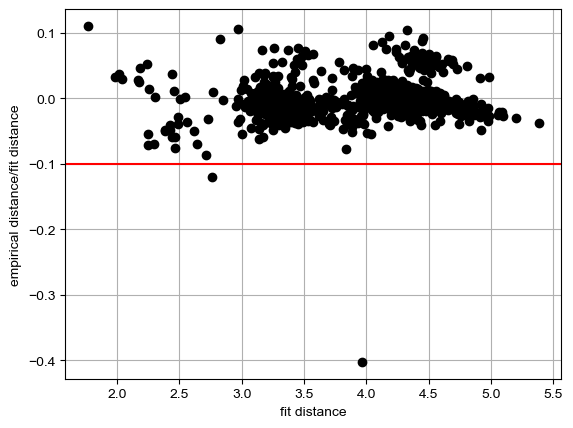

In [201]:
# plt.plot(fit_dist_jt,emp_dist_jt/fit_dist_jt-np.mean(emp_dist_jt/fit_dist_jt),'ko'); plt.axhline(-3.2*np.std(emp_dist_jt/fit_dist_jt),color='red'); plt.xlabel('fit distance'); plt.ylabel('empirical distance/fit distance'); plt.grid()
# pair = []; pval = []
# for k in np.where(emp_dist_jt/fit_dist_jt-np.mean(emp_dist_jt/fit_dist_jt) < -1.7 * np.std(emp_dist_jt/fit_dist_jt))[0]:
    # x = np.floor(np.sqrt(2*k+0.25)-0.5).astype('int')+1; y = int(k - 0.5*x*(x-1))
    # print(k, (emp_dist_jt/fit_dist_jt-np.mean(emp_dist_jt/fit_dist_jt))[k], sp.stats.norm.cdf((emp_dist_jt/fit_dist_jt-np.mean(emp_dist_jt/fit_dist_jt))[k],loc=1.67e-17,scale=np.std(emp_dist_jt/fit_dist_jt)), x, y)
    # pval.append(sp.stats.norm.cdf((emp_dist_jt/fit_dist_jt-np.mean(emp_dist_jt/fit_dist_jt))[k],loc=1.67e-17,scale=np.std(emp_dist_jt/fit_dist_jt)))
    # pair.append((x,y))

In [260]:
# list(map(tuple,node_to_pop['nodes'][np.ravel(pair)].values.reshape(16,2)))
# [(24, 28),(29, 25),(30, 33),(7, 35),(11, 35),(25, 35),(27, 35),(25, 36),(27, 36),(38, 36),(40, 25),(40,27),(41,27)]
# pair
## 2307 edge weights, 42 observed nodes
# 2*6130208.216 + 2*2, 2*obj.neg_log_lik() + 2*(2307+1), 2*obj_jt.neg_log_lik() + 2*(2307+42)
# print(obj.neg_log_lik(), 6130208.2162306)
obj_jt.neg_log_lik(), 6130208.216

(6103845.995719694, 6130208.216)

In [257]:
# permuted_idx = query_node_attributes(sp_graph, "permuted_idx")
# obs_perm_ids = permuted_idx[: sp_graph.n_observed_nodes]
# node_to_pop = pd.DataFrame(index = np.arange(sp_graph.n_observed_nodes), columns = ['nodes', 'pops'])
# node_to_pop['nodes'] = obs_perm_ids

# max_res_nodes = [(31,30),(35,11),(35,25),(36,25),(36,27),(38,36),(39,37),(35,34)] 
# list(map(tuple,node_to_pop['nodes'][np.ravel(pair)].values.reshape(16,2)))

# cval = []
# for p in [pair[i] for i in set(range(len(pair)))-set([2,8,12])]:
#     sp_graph_jt.fit(lamb=430.,optimize_q='n-dim',option='onlyc',long_range_edges=[p]); 
#     copp = sp_graph_jt.c
#     sp_graph_jt.fit(lamb=430.,optimize_q='n-dim',option='onlyc',long_range_edges=[p[::-1]])
#     cval.append(sp_graph_jt.c if sp_graph_jt.c > copp else copp)
#     print(p[::-1] if sp_graph_jt.c > copp else p)

lambda=430.000, alpha=0.6127, converged in 1 iterations, train_loss=6105665.901
587181.28443137 [0.29062445]


In [ ]:
# lamb_grid = np.geomspace(1e-4, 1e3, 20)[::-1]
# cv_err = run_cv(sp_graph_jt, lamb_grid, n_folds=sp_graph_jt.n_observed_nodes, factr=1e10)
# mean_cv_err = np.mean(cv_err, axis=0)
# float(lamb_grid[np.argmin(mean_cv_err)])

# plt.plot(lamb_grid,mean_cv_err,'bo'); plt.axvline(float(lamb_grid[np.argmin(mean_cv_err)]),color='orange'); plt.semilogx(); plt.xlabel(r'$\lambda$'); plt.ylabel('CV error')